# Public vs. Housing Banishment

This notebook will focus on separating and creating two distinct map layouts for:
- public banishment
- housing banishment - with 500ft vs. 250ft buffer

In [90]:
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.ops import unary_union

In [91]:
chicago_boundaries = pd.read_pickle('./data/pickle/chicago_boundaries')
bike_routes = pd.read_pickle('./data/pickle/bike_routes')
daycare_buffer = pd.read_pickle('./data/pickle/daycare_buffer')
forestry = pd.read_pickle('./data/pickle/forestry')
parks_buffer = pd.read_pickle('./data/pickle/parks_buffer')
schools_buffer = pd.read_pickle('./data/pickle/schools_buffer')
opens_spaces = pd.read_pickle('./data/pickle/open_spaces')
loc_aff_index = pd.read_pickle('./data/pickle/location_aff_index')

## Housing Banishment

In [92]:
housing_banishment = [daycare_buffer, parks_buffer, schools_buffer]

### 500 ft buffer

In [93]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

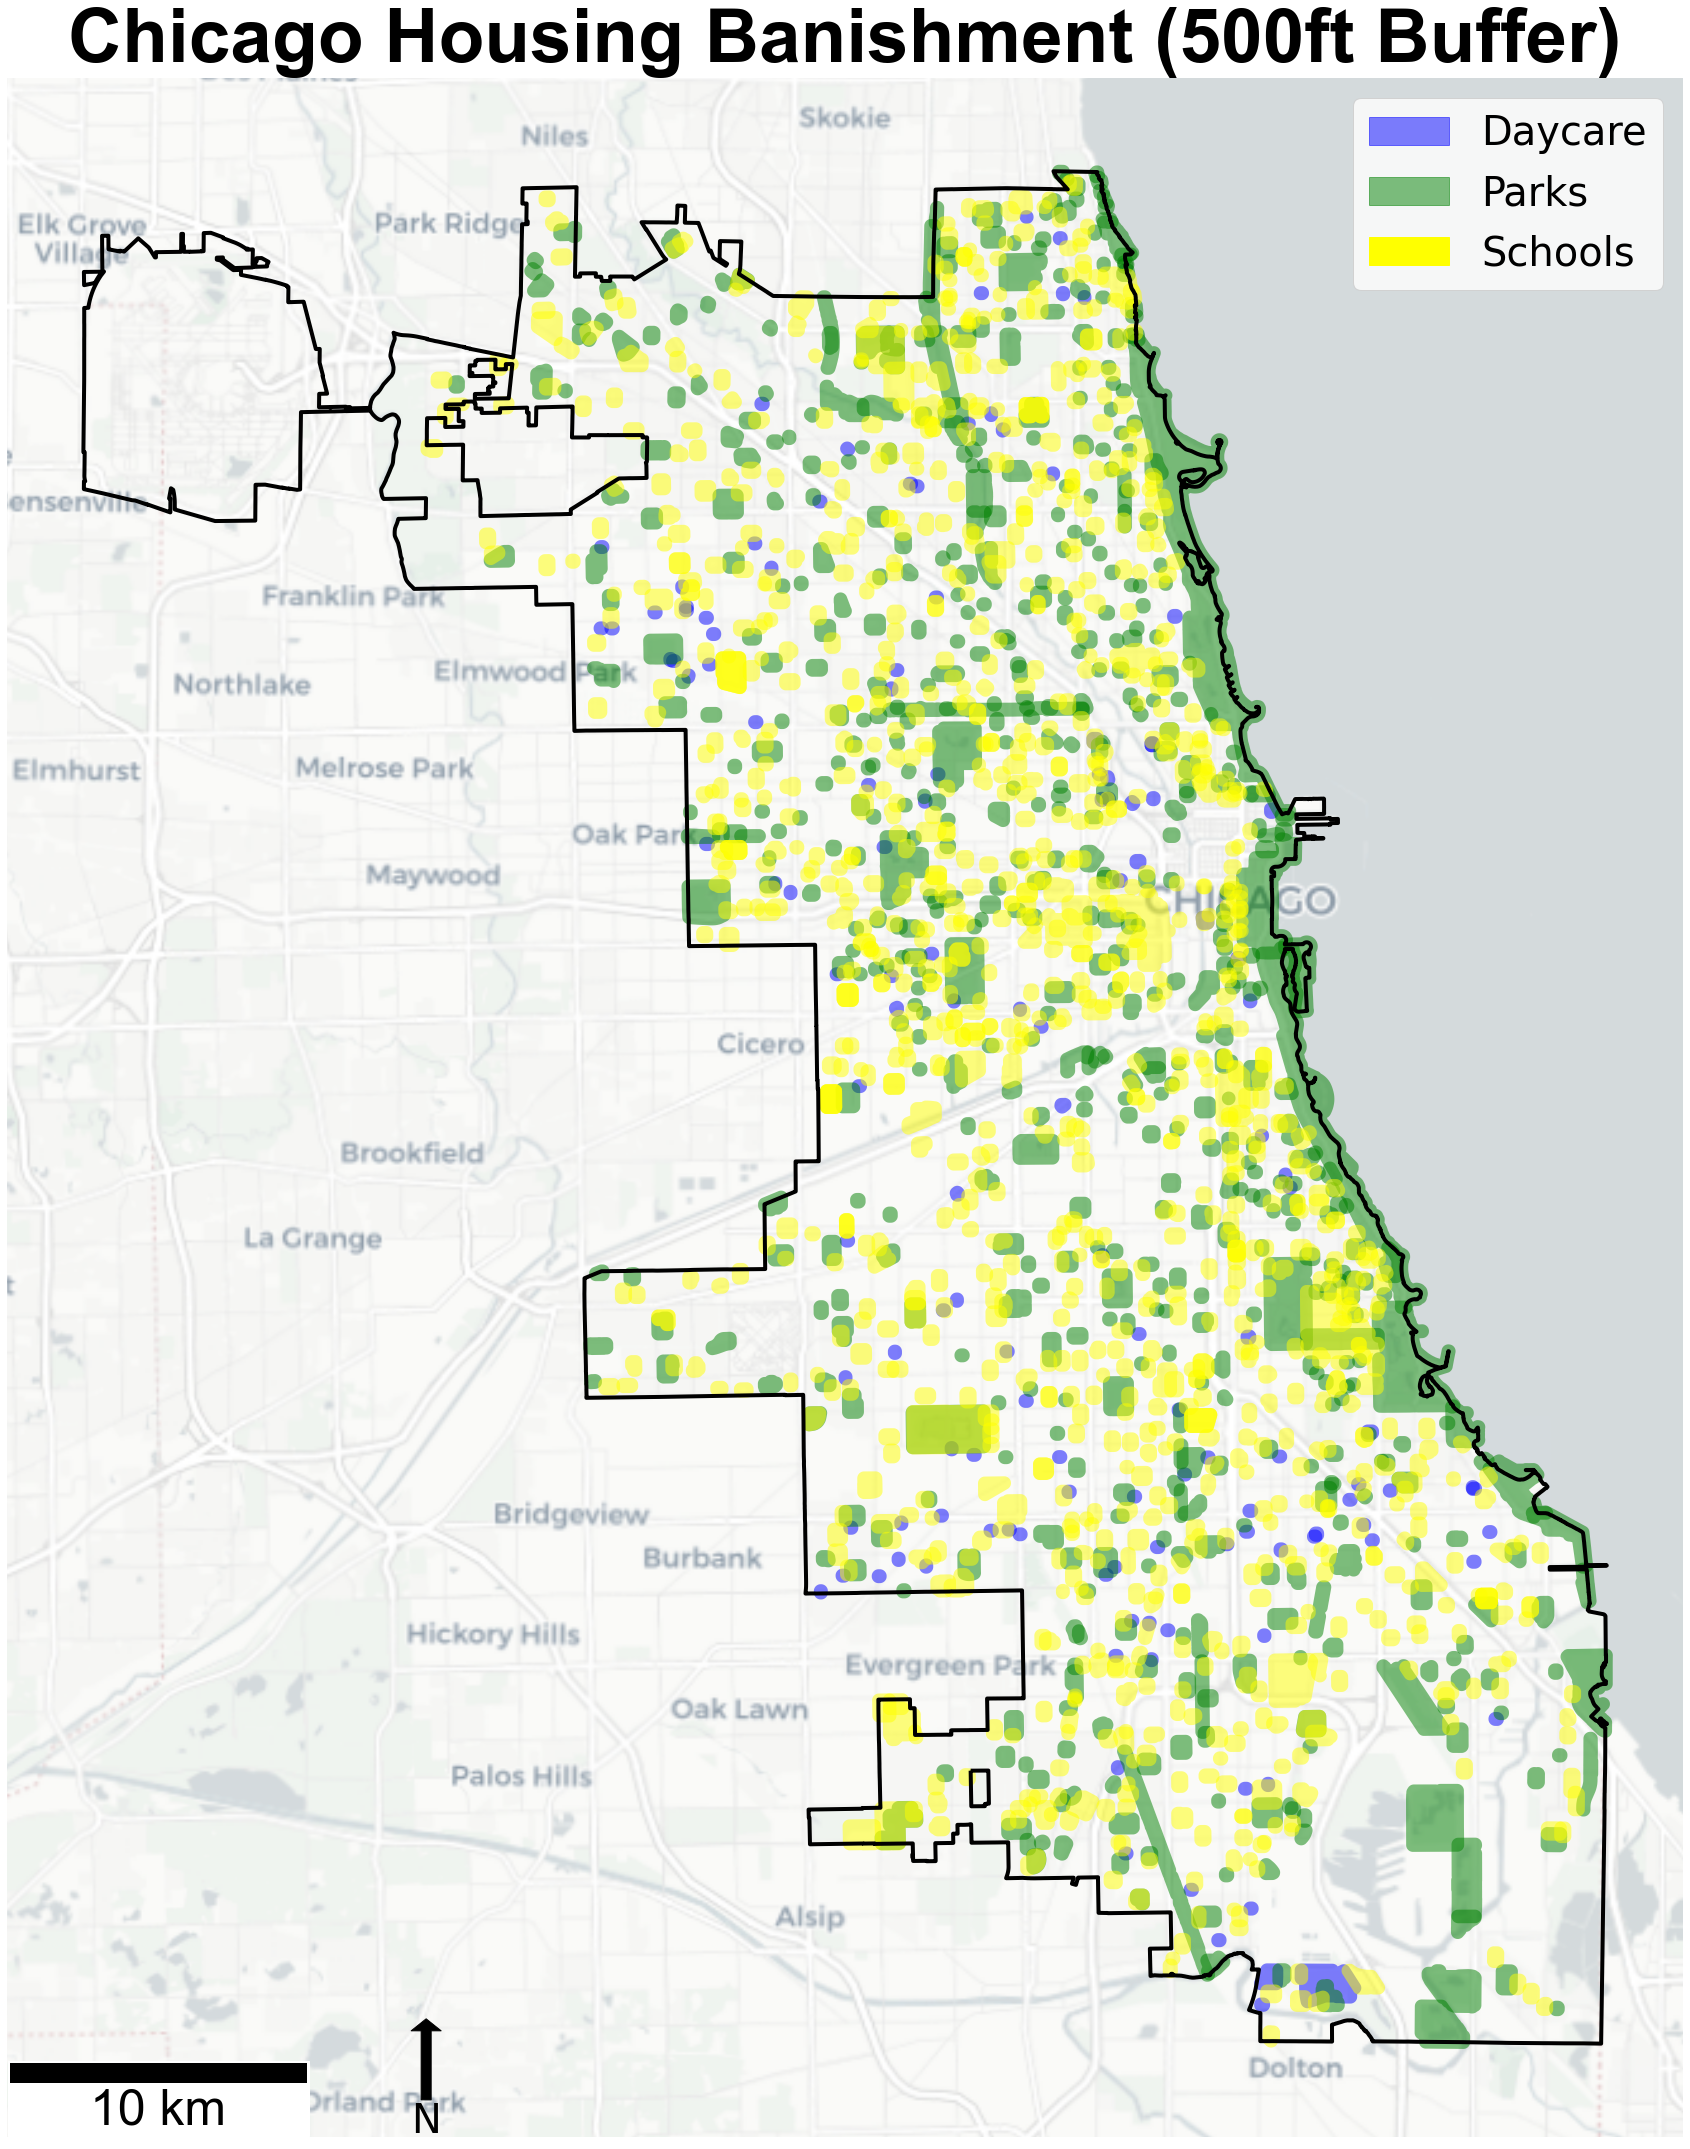

In [94]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (500ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})
# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_housing_banishment_500ft_buffer.png', transparent=True)
plt.show()

### 250 ft buffer

In [95]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

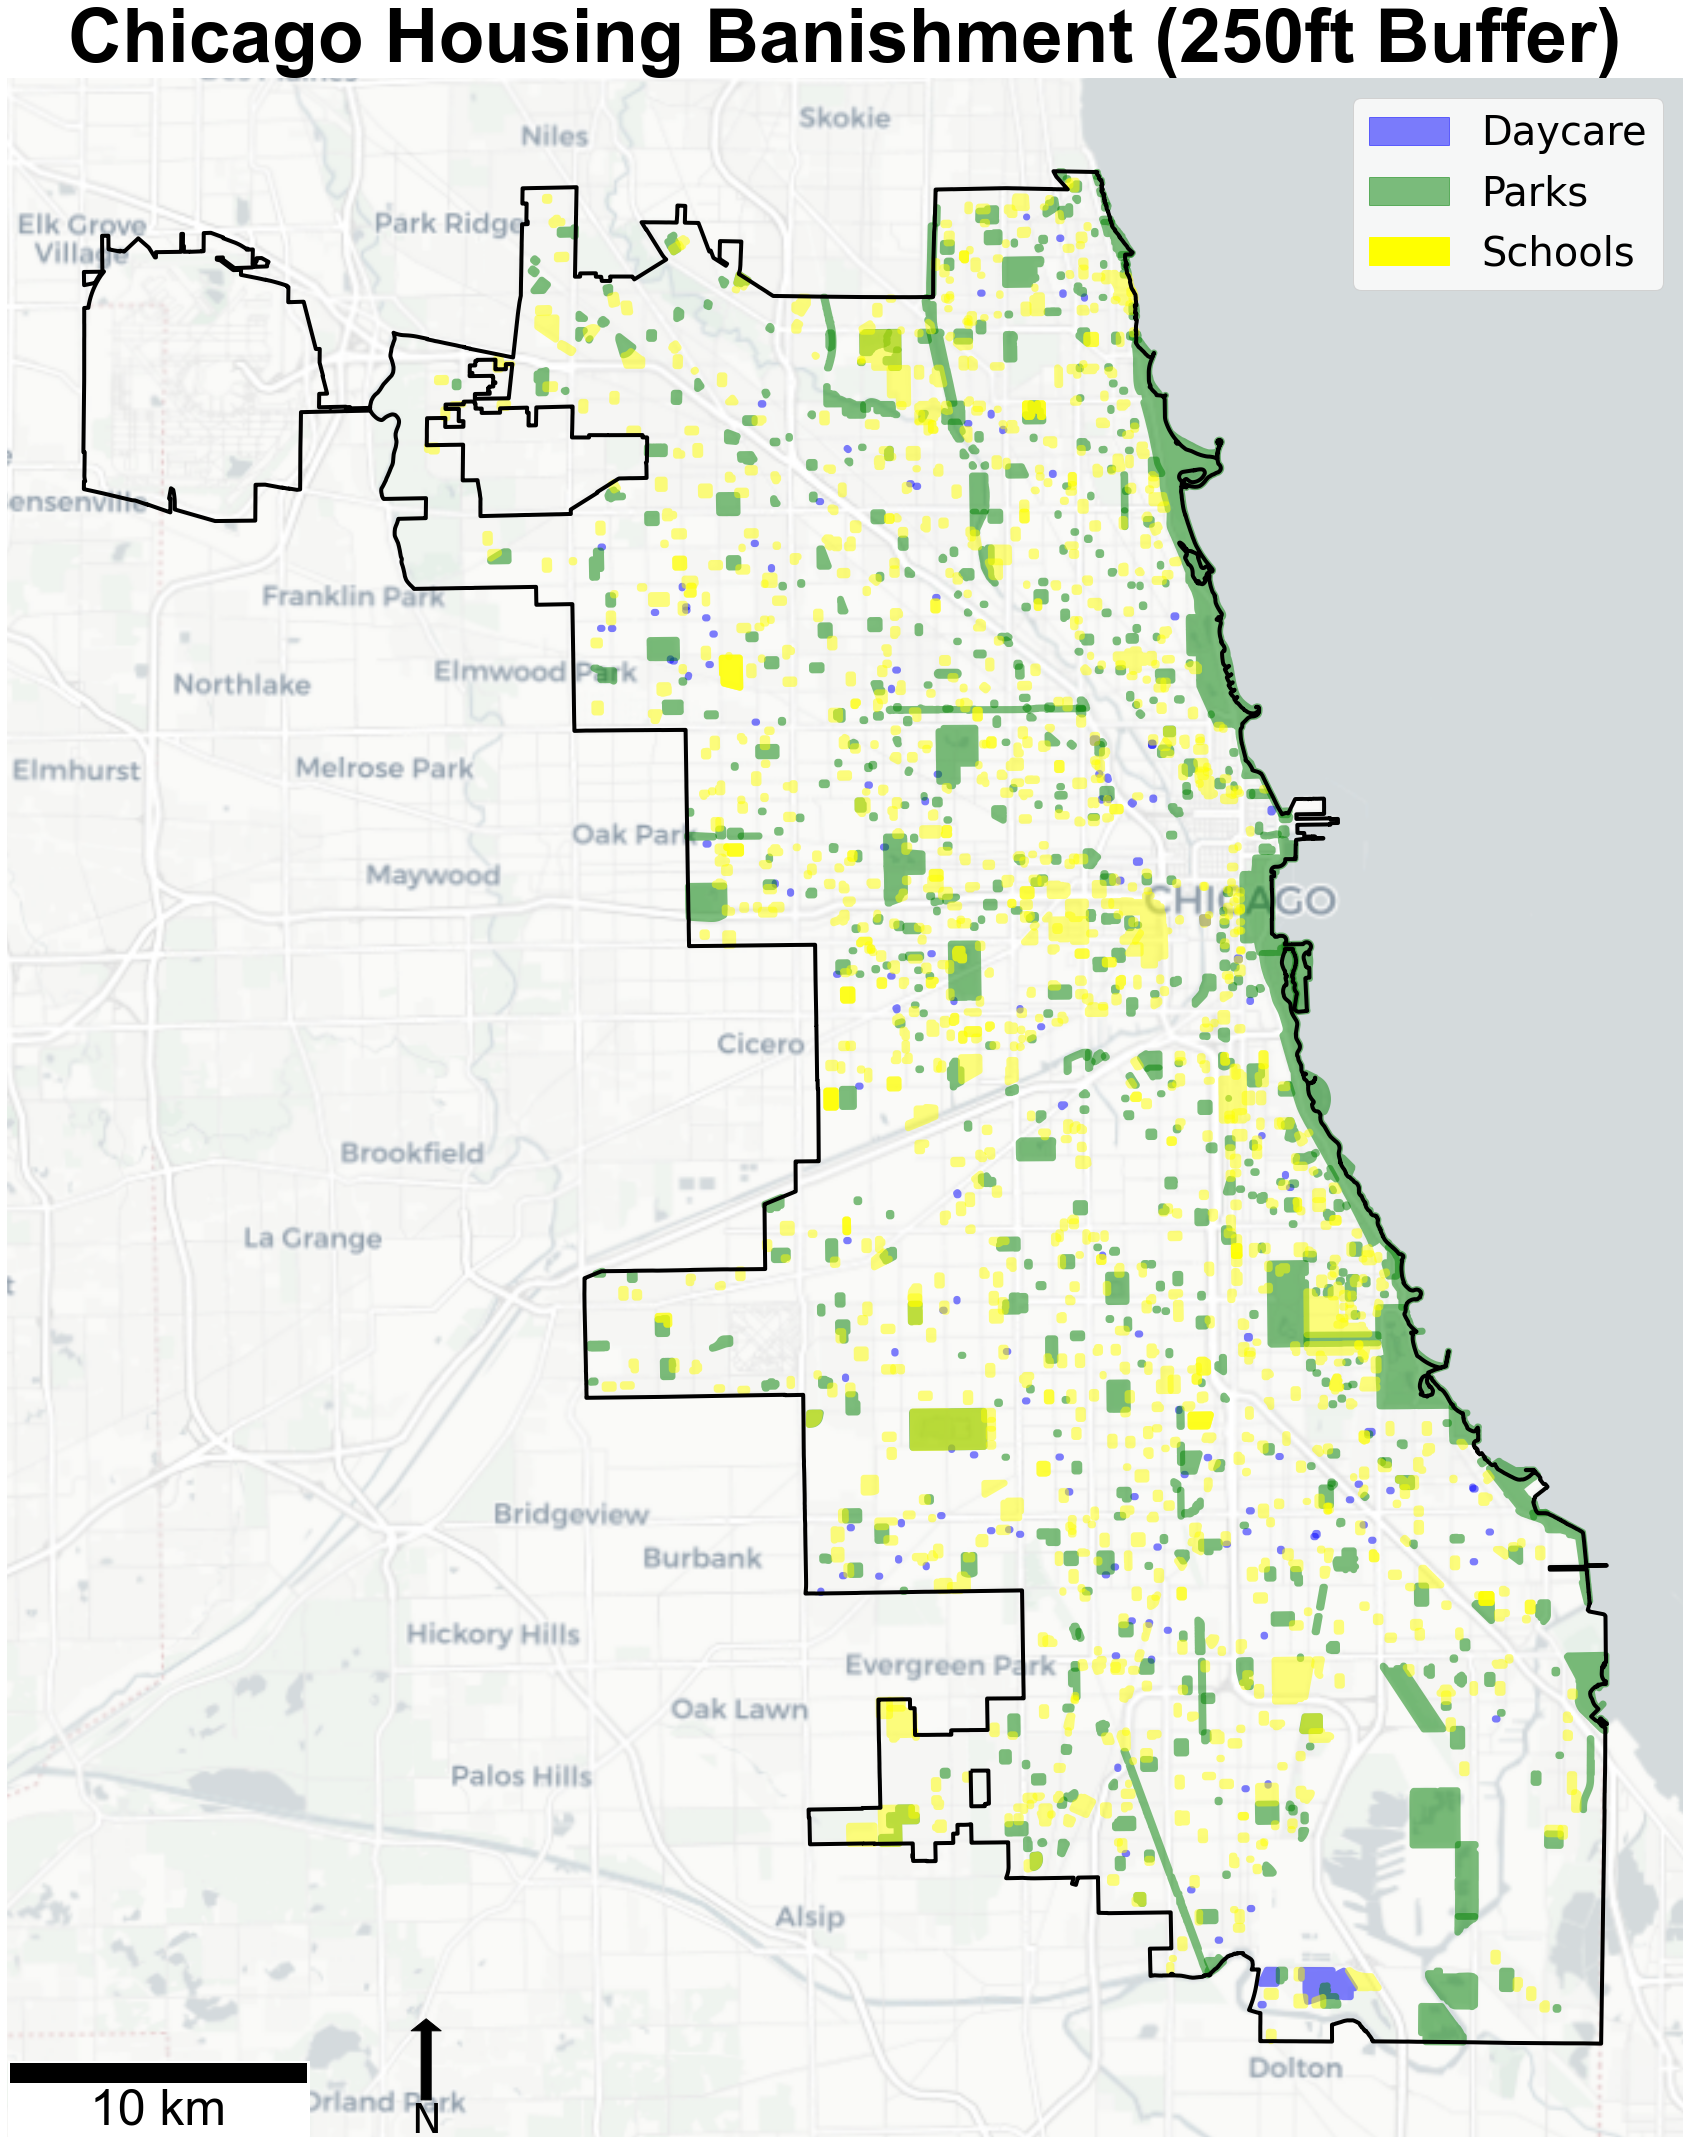

In [96]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_housing_banishment_250ft_buffer.png', transparent=True)
plt.show()

### Next Steps?

- Could be to merge all (3) housing banishment data frames into one, develop banishment zones, and overlay with census rent data.

- Show what eliminating daycares would do?

## Public Presence Banishment

- Any school
- Any public park building
- Any playground or recreation area
- Any public park
- Within 500ft of a public way or park whilst someone under the age of 18 is present
- Any daycare center
- Any county fair (when persons under the age of 18 are present)

To satisfy the above mandate, we will work with:
- Schools
- Daycre
- Parks
- Bike Paths (public way)
- Forest Preserves (public way)
- Open spaces - Boulevards zip? 


In [97]:
# make list of public banishment places
public_banishment = [schools_buffer, daycare_buffer, parks_buffer,bike_routes, 
                     forestry,opens_spaces]

In [98]:
# set geometry to standard non-buffered  geom
for gdf in public_banishment:
    gdf.set_geometry(col='geometry', inplace=True)

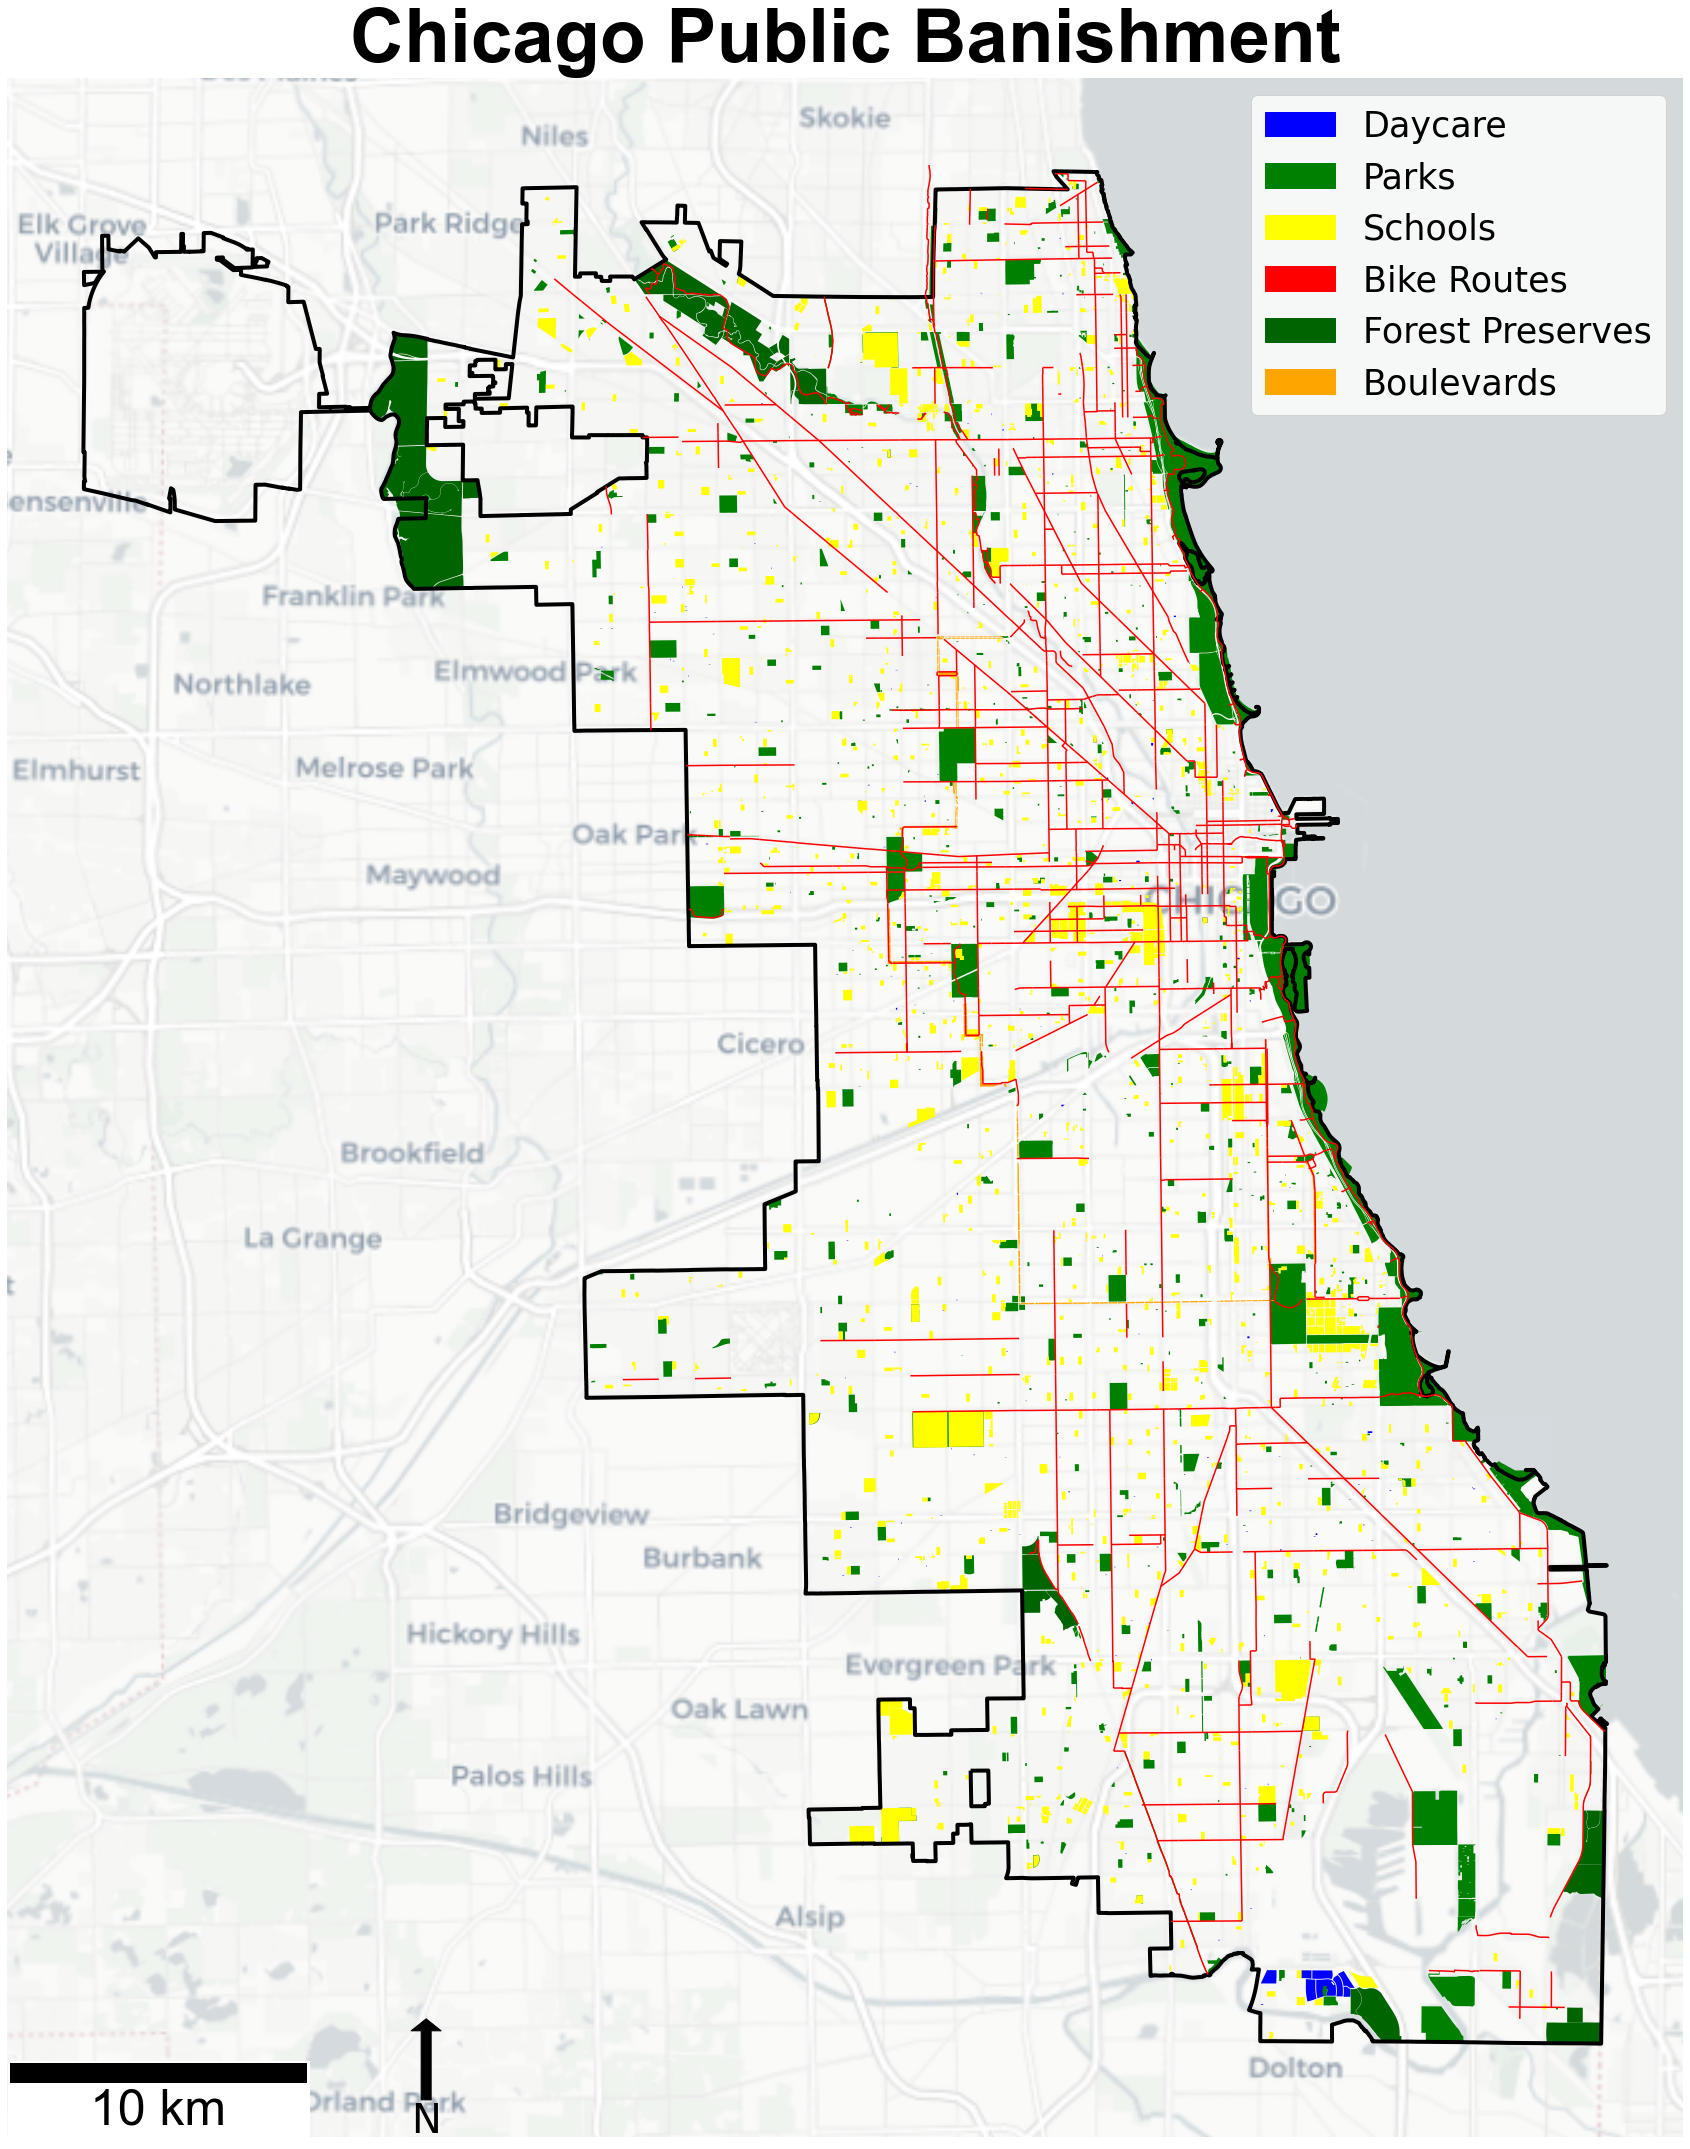

In [99]:
# public presence banishment map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

parks_buffer.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

schools_buffer.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

bike_routes.plot(color='red', ax=basemap)
bike_routes_leg = mpatches.Patch(color='red', label='Bike Routes')

forestry.plot(color='darkgreen', ax=basemap)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forest Preserves')

opens_spaces.plot(color='orange', ax=basemap)
opens_spaces_leg = mpatches.Patch(color='orange', label='Boulevards')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':35}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg,
                                          bike_routes_leg,
                                          forestry_leg, opens_spaces_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Public Banishment', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig('./images/chicago_public_banishment.png', transparent=True)
plt.show()

## Dissolve housing geometries

In [100]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

In [101]:
# create school buffer union
schools_buffer_diss_250 = schools_buffer['buffer_250'].unary_union

In [102]:
# create parks buffer union
parks_buffer_diss_250 = parks_buffer['buffer_250'].unary_union

In [103]:
# create daycare buffer union
daycare_buffer_diss_250 = daycare_buffer['buffer_250'].unary_union

In [111]:
# merge school and parks
schools_parks_buffer_250 = schools_buffer_diss_250.union(parks_buffer_diss_250)

In [112]:
# merge all geometries
housing_ban_buffer_250 = schools_parks_buffer_250.union(daycare_buffer_diss_250)

In [114]:
# put multipolygon into gdf so can plot
housing_diss_buffer_250 = gpd.GeoDataFrame(crs=schools_buffer.crs, 
                                           geometry=[housing_ban_buffer_250])

In [115]:
# preview df
housing_diss_buffer_250

geometry
0  MULTIPOLYGON (((448725.541 4610636.454, 448725...

In [116]:
housing_diss_buffer_250.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  1 non-null      geometry
dtypes: geometry(1)
memory usage: 136.0 bytes


In [117]:
housing_diss_buffer_250.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 90°W to 84°W - by country
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

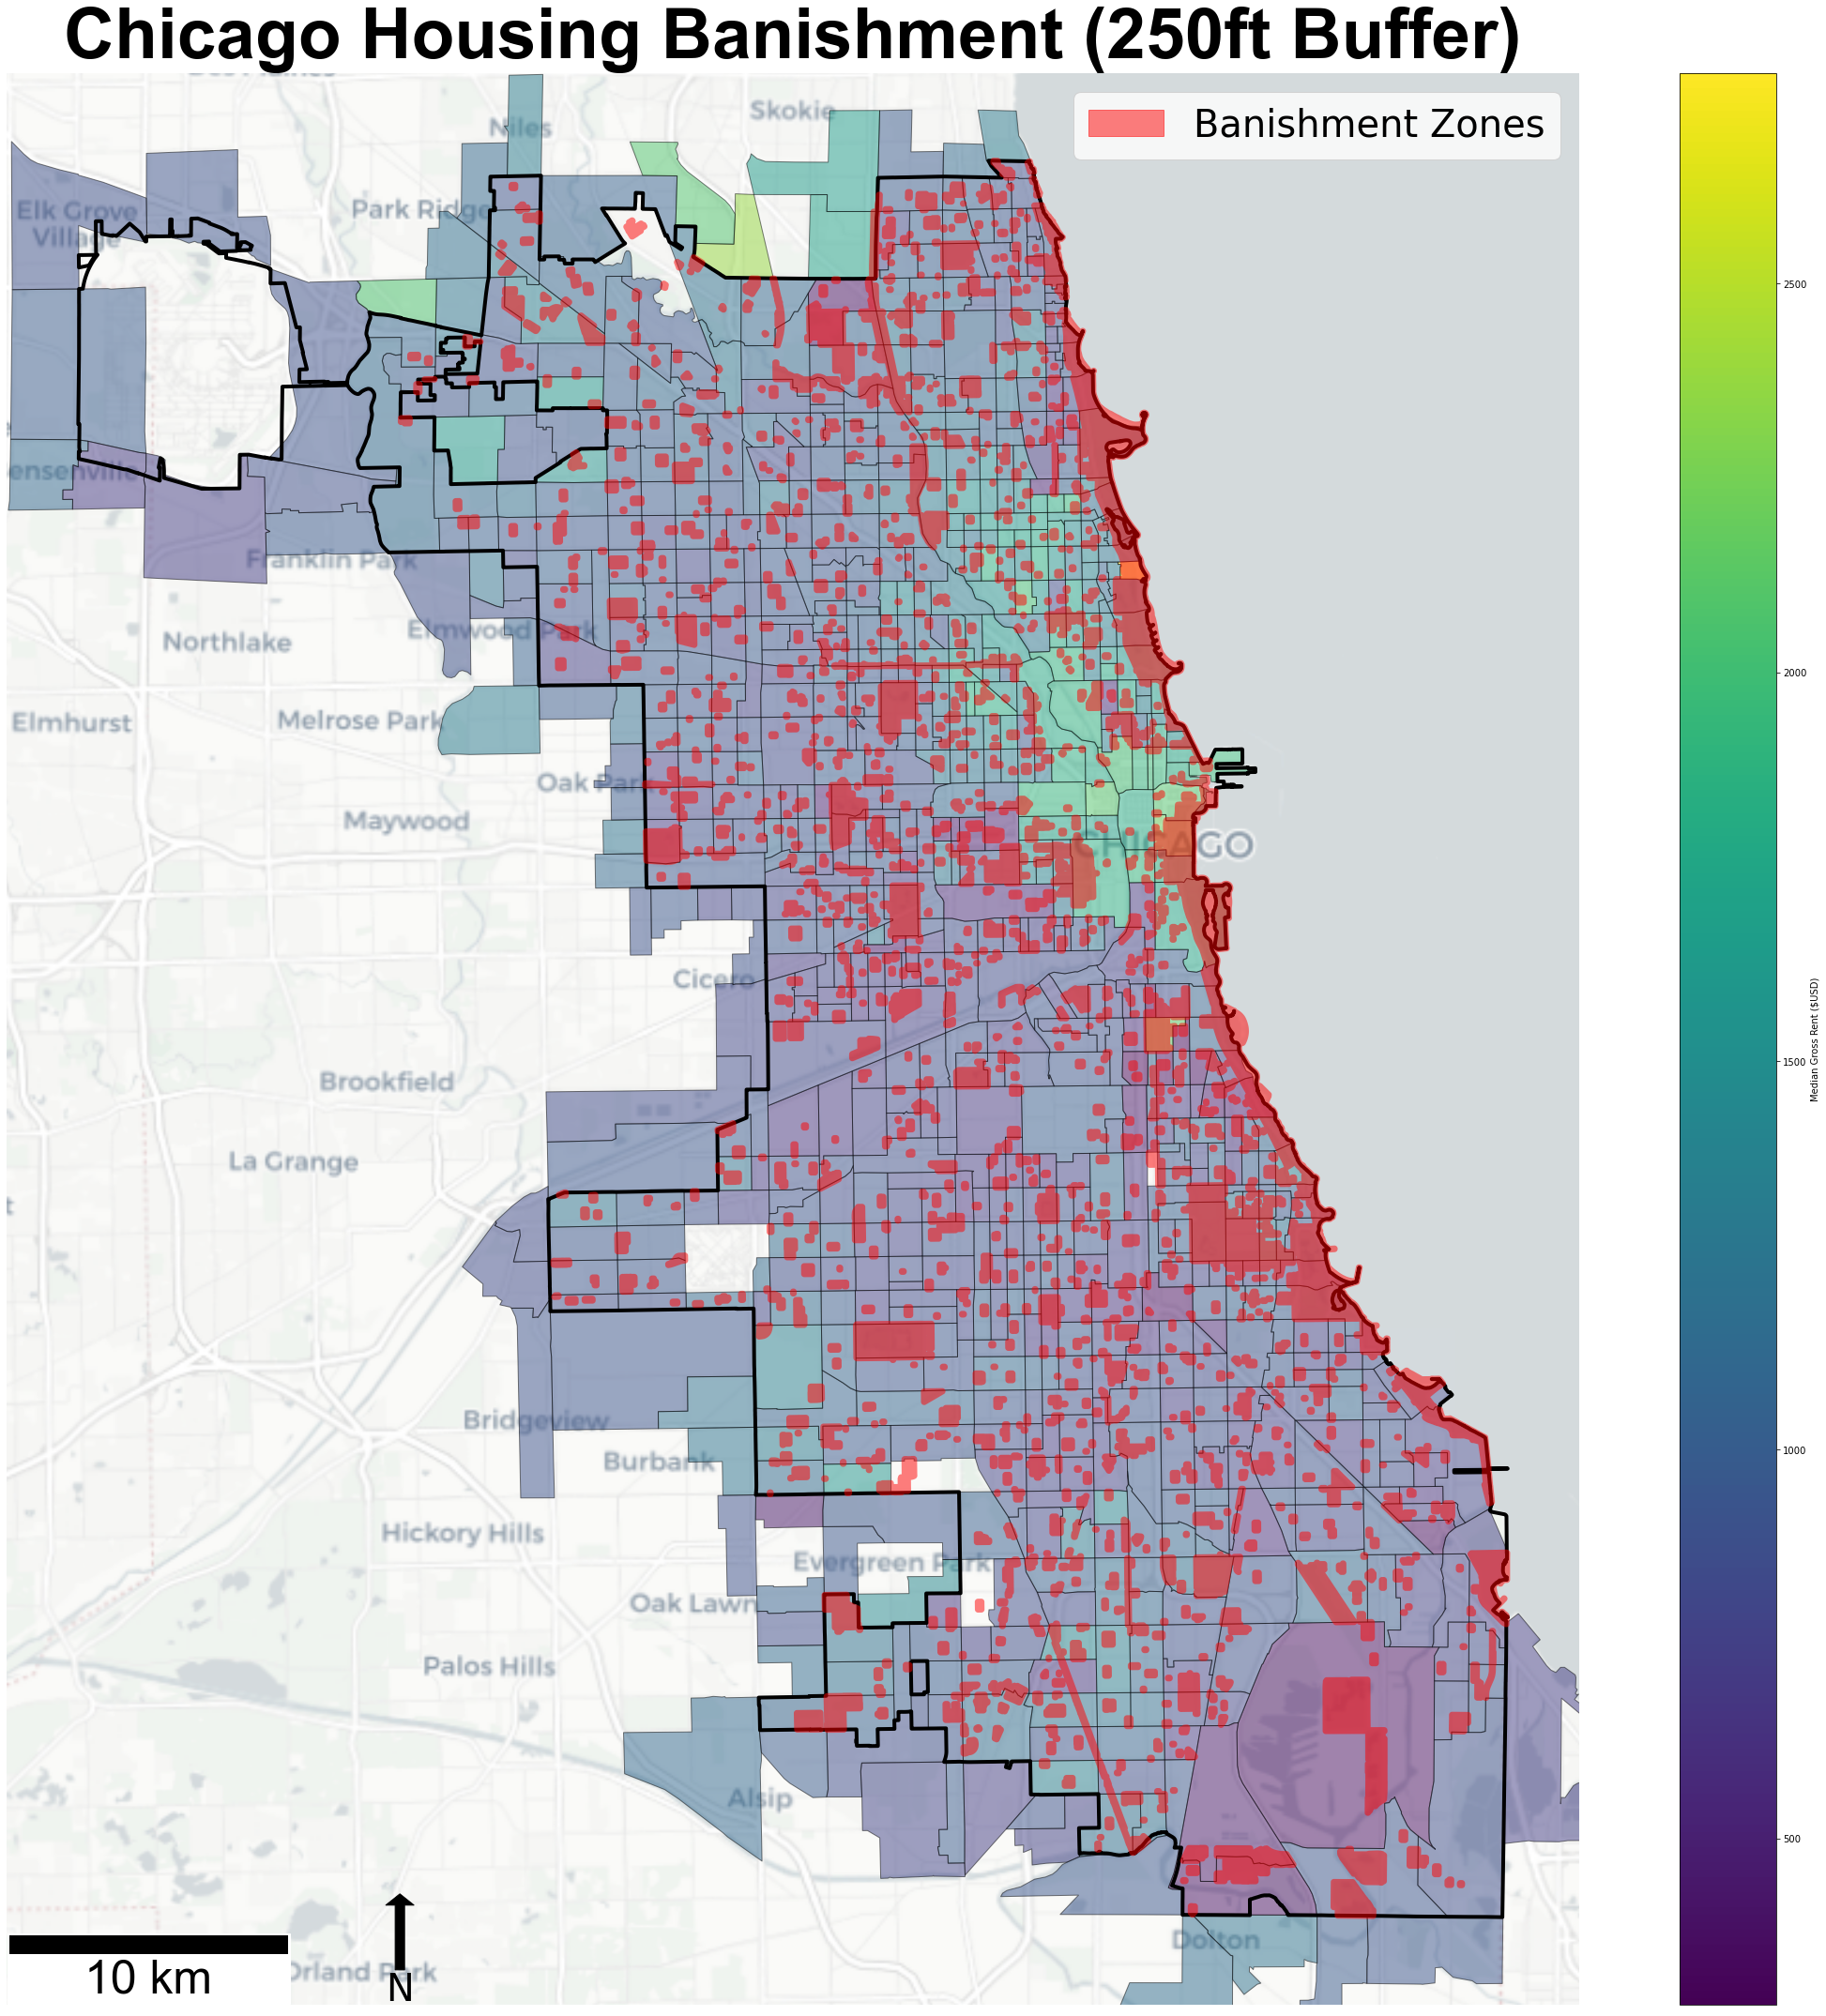

In [120]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot geometry
housing_diss_buffer_250.plot(color='red', ax=basemap, alpha=0.5, zorder=2)
housing_diss_buffer_leg = mpatches.Patch(color='red', label='Banishment Zones', alpha=0.5)

#plot loc_aff_index w cmap
loc_aff_index.plot(column='median_gro',ax=basemap, alpha=0.5, zorder=1,
                   edgecolor='k',
                   legend=True,
                  legend_kwds={'label':"Median Gross Rent ($USD)"})

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[housing_diss_buffer_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
# plt.savefig('./images/chicago_housing_banishment_250ft_buffer.png', transparent=True)
plt.show()

### Plot Public Banishment Zones w/ Median Rent

In [ ]:
#plot loc_aff_index with natural breaks
loc_aff_index.plot(column='median_gro',ax=ax, alpha=0.7,
                   legend=True,
                  scheme='naturalbreaks',
                   k=4,
                  missing_kwds={
                      "color":"lightgrey",
                      "edgecolor":"red",
                      "hatch":"///",
                      "label":"Missing Values"
                  })

In [ ]:
#plot loc_aff_index w cmap
loc_aff_index.plot(column='median_gro',ax=ax, alpha=0.7,
                   legend=True,
                  legend_kwds={'label':"Median Gross Rent ($USD)"})

### Next Steps
- try and create legend for median rent that can also have median rent
- continue to use unary_union and union to turn geometries into one shapefile for when bringing in median rent data.
- zoom in on at least (3) interesting areas in chicago (this could maybe be in the next notebook)